**1.GÜN**

In [2]:
# Gerekli kütüphaneleri yükleyelim
# İlk gün için çok fazla şeye ihtiyacımız olmayacak ama temel bazıları işimize yarayabilir
!pip install requests beautifulsoup4 # Eğer web'den veri çekeceksek (Common Crawl veya Wikipedia API)
!pip install pandas numpy # Veri manipülasyonu için
!pip install matplotlib seaborn # Görselleştirme için (ilerleyen günlerde lazım olacak)

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


# Token Bazlı Veri Analizi ve Metin Üretimi Modeli İçin Veri Hazırlama Projesi

## Proje Amacı:
Bu projenin temel amacı, doğal dil işleme (NLP) tabanlı bir metin üretim modelini eğitmek için uygun ve temizlenmiş bir veri seti hazırlamaktır. Bu süreç, veri toplama, temizleme, tokenizasyon ve detaylı istatistiksel analiz adımlarını içerecektir.

## Modelin Kullanım Alanları (Örnekler):
- Hikaye veya şiir üretimi
- Makale özetleme
- Soru-cevap sistemleri
- Diyalog tabanlı chatbotlar

## Geriye Dönük Çalışmalar (Literatür Taraması Notları):
- **Büyük Dil Modelleri (LLM'ler):** GPT-3, BERT, T5 gibi modeller genellikle milyarlarca token'lık veri setleri üzerinde eğitilir. Bu veri setleri genellikle Common Crawl, Wikipedia, kitaplar ve haber makalelerinden oluşur.
- **Veri Temizliği:** Model performansını doğrudan etkileyen kritik bir adımdır. Tekrarlı metinler, anlamsız karakterler ve dilbilgisel hatalar temizlenmelidir.
- **Tokenizasyon:** BPE (Byte Pair Encoding), WordPiece veya SentencePiece gibi yöntemler yaygın olarak kullanılır. Tokenizasyon, dil modelinin kelimeleri veya alt kelime birimlerini nasıl temsil ettiğini belirler.
- **Veri Çeşitliliği:** Modelin farklı konularda ve üsluplarda metin üretebilmesi için veri setinin çeşitli kaynaklardan gelmesi önemlidir.

### Potansiyel Veri Kaynakları:

1.  **Wikipedia Dump (Türkçe):**
    * Wikipedia'nın belirli dillerdeki tüm içeriğini içeren XML dosyalarıdır. Genellikle büyük boyutludur ve işleme gerektirir.
    * **Colab'da Erişim:** `requests` ile indirilip `BeautifulSoup` veya `lxml` ile parse edilebilir, ya da `gensim` gibi kütüphaneler Wikipedia dump'larını okuma yeteneğine sahiptir.

2.  **Common Crawl:**
    * Web'in büyük bir kısmının taranmış halidir. Çok büyüktür ve belirli bölümlerini çekmek için karmaşık araçlar gerektirebilir (örn. `warc` kütüphanesi).
    * **Colab'da Erişim:** Oldukça zorlu ve kaynak yoğun bir seçenektir. Daha küçük ölçekli projeler için genelde direkt Common Crawl kullanımı yerine, ondan türetilmiş hazır veri setleri tercih edilir (örn. C4 veri seti).

3.  **Project Gutenberg:**
    * Kamu malı kitapların dijitalleştirilmiş halidir. Özellikle eski edebiyat ve klasik metinler için zengin bir kaynaktır.
    * **Colab'da Erişim:** Genellikle direkt indirilip okunabilir metin dosyalarıdır. NLTK'de de bazı Gutenberg korpusları bulunur.

4.  **Hugging Face Datasets Kütüphanesi:**
    * Birçok hazır NLP veri setini kolayca indirmeye ve kullanmaya olanak tanır. Çoğu durumda temizlenmiş ve kullanıma hazırdır.
    * **Colab'da Erişim:** `!pip install datasets` komutuyla yüklendikten sonra doğrudan kullanılabilir. Örneğin, Türkçe için bazı özel veri setleri bulabiliriz.

5.  **Sosyal Medya Verisi (Örn: Reddit - Türkçe subreddit'ler):**
    * Farklı konuşma stillerini ve güncel dili yakalamak için faydalı olabilir. Reddit API veya `PRAW` kütüphanesi kullanılabilir.
    * **Colab'da Erişim:** API anahtarları gerektirebilir ve kullanım koşullarına dikkat etmek önemlidir.

6.  **Akademik Makaleler (Örn: ArXiv API):**
    * Bilimsel ve teknik dil yapısını öğrenmek için değerli olabilir.
    * **Colab'da Erişim:** ArXiv API ile makale özetleri veya tam metinler indirilebilir.

In [3]:
!pip install wikipedia-api

In [4]:
# Hugging Face Datasets kütüphanesini yükleyelim
!pip install datasets

from datasets import load_dataset

print("Hugging Face Datasets kütüphanesi yüklendi.")

# Türkçe Wikipedia'dan bir kesit yükleyelim
# Not: 'wiki40b' veri seti çok büyük olabilir.
# Sadece küçük bir kısmı ile başlamak daha iyi olacaktır.

try:
    # 'tr' Türkçe için dil kodu
    # İlk 1000 satırı yükleyelim
    # Daha büyük bir veri setini denemek isterseniz, 'split' ve 'num_samples' parametrelerini değiştirebilirsiniz.
    # Ancak unutmayın, 'wiki40b' GB'larca veri indirebilir!
    # Bu yüzden küçük bir örnekle başlıyoruz.

    # Eğer 'wiki40b' çok büyük gelirse, daha küçük Türkçe veri setlerini araştırabiliriz.
    # Örneğin: 'mkqa' veya 'turkish_ner' gibi. Ancak onlar metin üretimi için uygun olmayabilir.

    # Şimdilik, sadece 'text' sütununa sahip, genel bir Türkçe metin veri seti arayalım.
    # 'oscar' veri setinin Türkçe bölümü daha yönetilebilir olabilir.

    print("OSCAR veri setinin Türkçe bölümünü yüklemeye çalışılıyor...")
    # 'unshuffled_deduplicated_tr' Türkçe ve tekrar edenleri temizlenmiş versiyonu
    # Sadece ilk 1000 örnek için bir generator kullanabiliriz
    # Veya daha basit bir şekilde, sadece 'train' split'inin küçük bir kısmını yükleyelim.

    # Daha yönetilebilir bir örnek için OSCAR'ın küçük bir alt kümesini alalım
    # Burada tüm veri setini indirmeden, sadece ilk birkaç örneği almanın bir yolu yok doğrudan.
    # Ancak indirildikten sonra DataFrame'e çevirip slice edebiliriz.

    # Yinede büyük bir veri seti indirmemek için daha küçük bir örnek veri seti bulalım
    # Ya da sadece bir kaç sayfa wikipedia metnini direkt çekelim.

    # Daha basit bir yaklaşımla gidelim: Python ile direkt Wikipedia'dan metin çekme
    # Bu, büyük bir veri seti indirme sorununu aşmamızı sağlar.
    import wikipediaapi

    # 1. Gün: Proje Başlangıcı ve Veri Seti Araştırması (Colab Ortamı)

# ... (önceki kodlar) ...

# Adım 3: Veri Toplama (İlk Deneme - Hugging Face `wiki40b` Türkçesi)
# ...

    import wikipediaapi

    # **BURAYI DEĞİŞTİRİYORUZ:** user_agent belirtiyoruz
    # Lütfen 'YourProjectName (your_email@example.com)' kısmını kendi proje adınız ve e-posta adresinizle değiştirin.
    # Bu, Wikipedia'nın User-Agent politikasına uygun hareket etmenizi sağlar.
    wiki_wiki = wikipediaapi.Wikipedia(
    user_agent='TokenBazliVeriAnaliziProjesi (your_mail@mail.com)', # Burayı kendi e-posta adresinizle değiştirin
    language='tr'
     )


    # Örnek olarak birkaç farklı konudan makale çekelim
    topics = ["Yapay zeka", "İstanbul", "Türkiye", "Bilim", "Edebiyat"]
    raw_texts = []

    print("\nWikipedia'dan metinler çekiliyor...")
    for topic in topics:
        page = wiki_wiki.page(topic)
        if page.exists():
            raw_texts.append(page.text)
            print(f"'{topic}' makalesi çekildi. Uzunluk: {len(page.text)} karakter.")
        else:
            print(f"'{topic}' makalesi bulunamadı.")

    if not raw_texts:
        print("Hiç metin çekilemedi. Lütfen konu başlıklarını kontrol edin veya farklı konular deneyin.")
    else:
        # Çekilen metinleri bir dosyaya kaydedelim (ilerleyen günlerde kullanılmak üzere)
        with open("raw_turkish_wikipedia_text.txt", "w", encoding="utf-8") as f:
            for text in raw_texts:
                f.write(text + "\n\n---\n\n") # Makaleler arasına ayırıcı ekleyelim
        print(f"\nÇekilen {len(raw_texts)} makale 'raw_turkish_wikipedia_text.txt' dosyasına kaydedildi.")

except Exception as e:
    print(f"Veri yükleme/çekme sırasında bir hata oluştu: {e}")
    print("Alternatif olarak, Hugging Face Datasets'ten daha küçük Türkçe veri setleri araştırmanız gerekebilir.")
    print("Örn: 'mkqa' (sadece soru-cevap formatı olabilir), 'turkish_ner' (NER etiketli metinler).")

Hugging Face Datasets kütüphanesi yüklendi.
OSCAR veri setinin Türkçe bölümünü yüklemeye çalışılıyor...

Wikipedia'dan metinler çekiliyor...
'Yapay zeka' makalesi çekildi. Uzunluk: 25529 karakter.
'İstanbul' makalesi çekildi. Uzunluk: 90322 karakter.
'Türkiye' makalesi çekildi. Uzunluk: 77877 karakter.
'Bilim' makalesi çekildi. Uzunluk: 61519 karakter.
'Edebiyat' makalesi çekildi. Uzunluk: 9101 karakter.

Çekilen 5 makale 'raw_turkish_wikipedia_text.txt' dosyasına kaydedildi.


**2.GÜN**

In [5]:
# 2. Gün: Veri Temizleme ve Tokenizasyon

# ----------------------------------------------------
# Adım 0: NLTK punkt modelini indirme (Eğer daha önce indirmediyseniz bir kez çalıştırın)
# ----------------------------------------------------
import nltk
nltk.download('punkt') # Bu satır zaten vardı
nltk.download('punkt_tab') # BU YENİ SATIR
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    print("NLTK 'punkt' modeli indiriliyor...")
    nltk.download('punkt')
    print("NLTK 'punkt' modeli indirildi.")
else:
    print("NLTK 'punkt' modeli zaten yüklü.")

# ----------------------------------------------------
# Adım 1: Raw Metinleri Yükleme
# ----------------------------------------------------
import re
import pandas as pd
from nltk.tokenize import word_tokenize

try:
    with open("raw_turkish_wikipedia_text.txt", "r", encoding="utf-8") as f:
        raw_text_content = f.read()
    print("Raw metin dosyası başarıyla yüklendi.")
    print(f"Toplam karakter sayısı: {len(raw_text_content)}")

    articles = [art.strip() for art in raw_text_content.split('---') if art.strip()]
    print(f"Toplam {len(articles)} adet makale algılandı.")

except FileNotFoundError:
    print("Hata: 'raw_turkish_wikipedia_text.txt' dosyası bulunamadı. Lütfen ilk günkü adımları doğru şekilde tamamladığınızdan emin olun.")
    articles = []
except Exception as e:
    print(f"Metin dosyasını okurken bir hata oluştu: {e}")
    articles = []

if articles:
    print("\nİlk makaleden bir kesit (ilk 500 karakter):")
    print(articles[0][:500])

# ----------------------------------------------------
# Adım 2: Veri Temizliği (Derinlemesine)
# ----------------------------------------------------
cleaned_texts = []

print("\nMetinler temizleniyor...")
for article_text in articles:
    # 1. Parantez içindeki referansları temizle (örn. [1], [kaynakça], [A], [B] gibi)
    text = re.sub(r'\[.*?\]', '', article_text)

    # 2. Birden fazla yeni satır karakterini tek yeni satıra düşür
    text = re.sub(r'\n+', '\n', text)

    # 3. Birden fazla boşluğu tek boşluğa düşür
    text = re.sub(r' +', ' ', text)

    # 4. Metnin başındaki ve sonundaki boşlukları temizle
    text = text.strip()

    # 5. Özel karakterleri (örn. HTML etiketleri veya anlamsız semboller) temizle
    # Sadece harfler, sayılar, Türkçe karakterler ve temel noktalama işaretleri kalsın
    # Türkçe karakterler: çÇğĞıİöÖşŞüÜ
    # Noktalama işaretleri: .,!?;:()
    text = re.sub(r'[^\w\sçÇğĞıİöÖşŞüÜ.,!?;:]', '', text) # Ek parantez ve noktalı virgül

    # Noktalama işaretlerinden sonra boşluk olmasını sağla (birden fazla nokta vs. durumu için ayarlandı)
    text = re.sub(r'([.,!?;:])(\S)', r'\1 \2', text)

    # Fazladan boşlukları tekrar temizle (noktalama sonrası oluşan boşluklar olabilir)
    text = re.sub(r' +', ' ', text)
    text = text.strip()


    cleaned_texts.append(text)

print(f"Temizlenmiş {len(cleaned_texts)} makale mevcut.")
if cleaned_texts:
    print("\nİlk temizlenmiş makaleden bir kesit (ilk 500 karakter):")
    print(cleaned_texts[0][:500])

# ----------------------------------------------------
# Adım 3: Tokenizasyon İşlemi
# ----------------------------------------------------
tokenized_articles = []
print("\nTokenizasyon işlemi başlatılıyor...")
for text in cleaned_texts:
    # NLTK'nın Türkçe destekli kelime tokenizasyonunu kullanalım
    # Önce küçük harfe çevirelim (normlizasyon)
    # Rakamları da token olarak tutalım. Sadece harf değil, tüm "kelime" birimleri.
    tokens = word_tokenize(text.lower(), language='turkish')
    tokenized_articles.append(tokens)

print(f"Toplam {len(tokenized_articles)} adet tokenize edilmiş makale mevcut.")
if tokenized_articles:
    print("\nİlk tokenize edilmiş makalenin ilk 20 token'ı:")
    print(tokenized_articles[0][:20])

# ----------------------------------------------------
# Adım 4: Veri Formatı ve Yapılandırma
# ----------------------------------------------------
# Tüm token'ları tek bir büyük listeye ekleyelim. Bu, genel analiz için daha uygundur.
all_tokens = [token for sublist in tokenized_articles for token in sublist]
print(f"\nTüm makalelerden toplam {len(all_tokens)} adet token çıkarıldı.")

# Tokenleri DataFrame'e dönüştürelim (ileri analizler ve kaydetmek için faydalı)
df_tokens = pd.DataFrame({'token': all_tokens})
print("\nToken'lar DataFrame'e dönüştürüldü. İlk 5 satır:")
print(df_tokens.head())

# ----------------------------------------------------
# Adım 5: Örnek Küme Oluşturma
# ----------------------------------------------------
import random

# Eğer 10,000 token'dan azsa, tümünü kullanalım. Fazlaysa 10,000 token alalım.
# Bu örnek küme, 3. günkü analizlerimiz için kullanılacak.
sample_token_size = min(10000, len(all_tokens))
# Eğer toplam token sayısı 0 ise hata vermemek için kontrol ekleyelim
if len(all_tokens) > 0:
    sample_tokens = random.sample(all_tokens, sample_token_size)
else:
    sample_tokens = [] # Hiç token yoksa boş liste

print(f"\nAnaliz için {len(sample_tokens)} adet token'lık bir örnek küme oluşturuldu.")
if sample_tokens:
    print("Örnek kümenin ilk 20 token'ı:")
    print(sample_tokens[:20])
else:
    print("Örnek küme oluşturulamadı, çünkü veri setinde hiç token bulunamadı.")

# Tokenleri bir dosyaya kaydedelim (ilerleyen günler için)
with open("processed_turkish_tokens.txt", "w", encoding="utf-8") as f:
    f.write('\n'.join(all_tokens)) # Her tokenı yeni satıra yazalım
print("\nTüm işlenmiş tokenler 'processed_turkish_tokens.txt' dosyasına kaydedildi.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NLTK 'punkt' modeli zaten yüklü.
Raw metin dosyası başarıyla yüklendi.
Toplam karakter sayısı: 264383
Toplam 5 adet makale algılandı.

İlk makaleden bir kesit (ilk 500 karakter):
Yapay zekâ (İngilizce: artificial intelligence ya da kısaca AI), insanlar da dahil olmak üzere hayvanlar tarafından, doğal zekânın aksine makineler tarafından görüntülenen zekâ çeşididir. Dördüncü Sanayi Devrimi'nin en yaygın özelliklerinden biri olarak kabul edilir. İlk ve ikinci kategoriler arasındaki ayrım genellikle seçilen kısaltmayla ortaya çıkar. Güçlü yapay zeka genellikle Yapay genel zekâ (İngilizce: artificial general intelligence kelimelerinin kısaltılmışı olarak: AGI) olarak etiketle

Metinler temizleniyor...
Temizlenmiş 5 makale mevcut.

İlk temizlenmiş makaleden bir kesit (ilk 500 karakter):
Yapay zekâ İngilizce: artificial intelligence ya da kısaca AI, insanlar da dahil olmak üzere hayvanlar tarafından, doğal zekânın aksine makineler tarafından görüntülenen zekâ çeşididir. Dördüncü Sanayi Devrim

**3. GÜN**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-6-dbb7a5272438>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette='viridis')



En sık kullanılan 20 token:
',': 586
'.': 573
've': 357
'bir': 135
'bu': 72
'olarak': 60
'ile': 55
'en': 52
'gibi': 51
'i̇stanbul': 48
'olan': 44
'de': 44
'yılında': 42
'büyük': 41
'bilim': 41
'ise': 39
';': 37
'önemli': 32
'da': 32
'tarafından': 28

En nadir kullanılan 20 token (sadece 1 kez geçenler hariç):
'belirlendi': 2
'hekim': 2
'gerçek': 2
'yaş': 2
'anlayan': 2
'fay': 2
'dinin': 2
'sonradan': 2
'anatomik': 2
'edebiyatının': 2
'kum': 2
'getirdiği': 2
'adlı': 2
'bulundu': 2
'buldukları': 2
'olguları': 2
'2005': 2
'ilişkisi': 2
'üyelerinden': 2
'mutfağı': 2


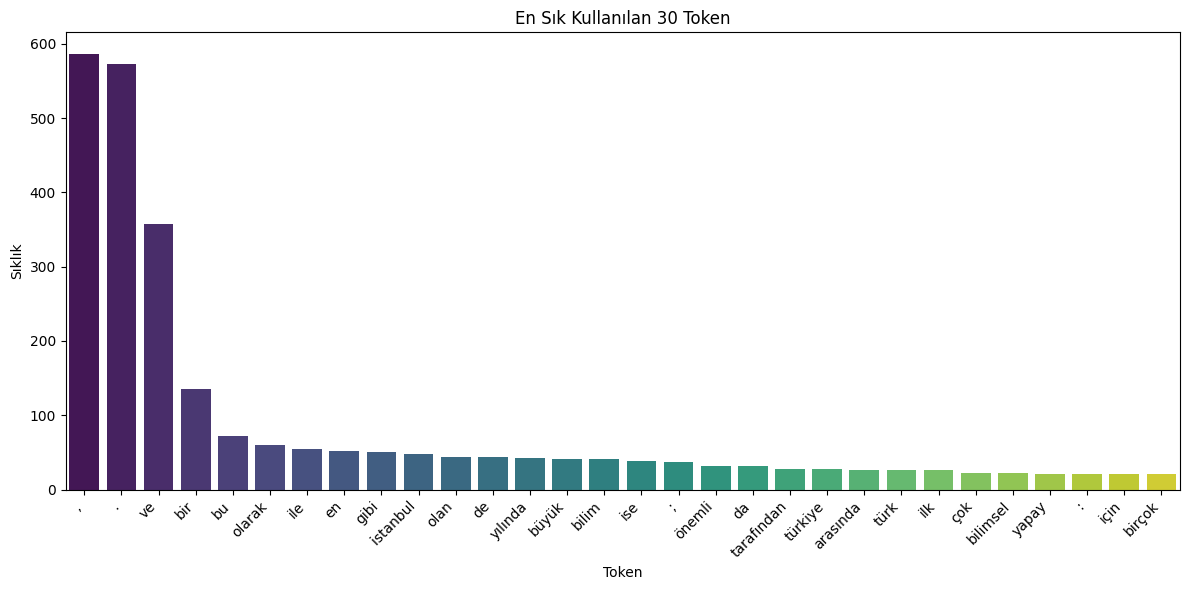

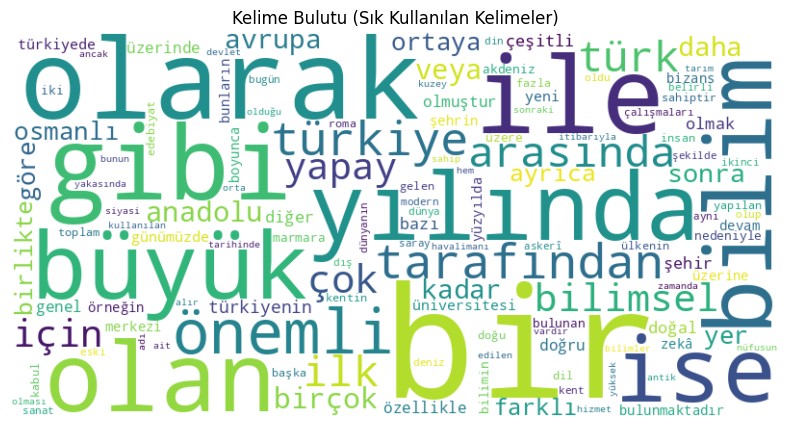


Belirli kelimelerin bağlamlarını inceleme (Co-occurrence - basit örnek):

En sık beraber geçen kelime çiftlerinden bazıları (belirli kelimeler etrafında):
('.', ','): 851
(',', '.'): 851
(',', 've'): 828
('ve', ','): 828
('.', 've'): 581
('ve', '.'): 581
('bir', '.'): 316
('.', 'bir'): 316
('.', 'bu'): 255
('bu', '.'): 255
('bir', ','): 190
(',', 'bir'): 190
('olarak', '.'): 160
('.', 'olarak'): 160
('bu', ','): 143
(',', 'bu'): 143
('.', 'en'): 139
('en', '.'): 139
('ve', 'bir'): 137
('bir', 've'): 137

NLTK 'stopwords' modeli zaten yüklü.

Türkçe stop words listesinden ilk 10 kelime: ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz']
Toplam token'ların %8.71'si stop word'lerden oluşuyor.

Toplam benzersiz token sayısı (vocabulary size): 4485
Tip-Token Oranı (TTR): 0.4485 (Yakınlık 1'e doğru, metin çeşitliliği gösterir)

--- 3. Gün Analizi Tamamlandı ---


In [6]:
# 3. Gün: Token Sıklığı ve İstatistiksel Analiz

# ----------------------------------------------------
# Adım 1: Token Sıklığı Analizi
# ----------------------------------------------------
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # Kelime bulutu için
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords') # BU YENİ SATIR

# Örnek kümemizdeki token'lar üzerinde çalışalım
# Eğer sample_tokens boşsa, all_tokens'ı kullanırız (daha fazla veri varsa)
tokens_to_analyze = sample_tokens if sample_tokens else all_tokens

if not tokens_to_analyze:
    print("Analiz edilecek token bulunamadı. Lütfen önceki adımları kontrol edin.")
else:
    token_counts = Counter(tokens_to_analyze)

    print("\nEn sık kullanılan 20 token:")
    for token, count in token_counts.most_common(20):
        print(f"'{token}': {count}")

    print("\nEn nadir kullanılan 20 token (sadece 1 kez geçenler hariç):")
    # Sadece 1 kez geçen kelimeleri filtreleyip nadir olanları görelim
    rare_tokens = [(token, count) for token, count in token_counts.items() if count > 1]
    # En az geçenlerden ilk 20'yi alalım (sayımına göre sıralanmış)
    for token, count in sorted(rare_tokens, key=lambda item: item[1])[:20]:
        print(f"'{token}': {count}")

# ----------------------------------------------------
# Adım 2: Frekans Dağılımı Görselleştirme
# ----------------------------------------------------

    # En sık kullanılan 30 token'ın histogramı
    top_tokens = token_counts.most_common(30)
    words = [word for word, count in top_tokens]
    counts = [count for word, count in top_tokens]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=words, y=counts, palette='viridis')
    plt.title('En Sık Kullanılan 30 Token')
    plt.xlabel('Token')
    plt.ylabel('Sıklık')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Kelime Bulutu Oluşturma
    # Çok yaygın kelimeleri (noktalama, bağlaçlar vb.) dışarıda bırakmak için bir ön filtreleme yapalım.
    # Bu adımı 4. gün 'stop words' ile daha detaylı yapacağız.
    filtered_tokens_for_wordcloud = [token for token in tokens_to_analyze if token.isalpha() and len(token) > 2]

    if filtered_tokens_for_wordcloud:
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                              collocations=False, # Tekrar eden kelime çiftlerini göstermez
                              min_font_size=10).generate(" ".join(filtered_tokens_for_wordcloud))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Kelime Bulutu (Sık Kullanılan Kelimeler)')
        plt.show()
    else:
        print("Kelime bulutu oluşturmak için yeterli sayıda filtreli token bulunamadı.")


# ----------------------------------------------------
# Adım 3: Kelime Dağılımı ve İlişkiler (Co-occurrence - Basit Yaklaşım)
# ----------------------------------------------------
    # Bu adım, daha karmaşık bir analiz gerektirir (örneğin kayan pencereler).
    # Şimdilik, belirli kelimelerle sıkça geçen kelimelere bakalım.
    # Örneğin, 'yapay' kelimesiyle en çok hangi kelimeler geçiyor?

    # Basit bir co-occurrence analizi için: 'N' kelimelik pencereler içinde eşleşmeler.
    # Her bir makaleyi liste olarak alalım
    # `tokenized_articles` listesini kullanacağız.

    print("\nBelirli kelimelerin bağlamlarını inceleme (Co-occurrence - basit örnek):")
    # 'yapay' kelimesinin geçtiği cümlelerden kelimeleri toplayalım
    # Basitlik adına, sadece makalelerin içindeki kelime çiftlerini inceleyeceğiz.
    # Daha gelişmiş co-occurrence için NLTK veya SpaCy'nin özelliklerini kullanabiliriz.

    # En sık geçen kelimelerin etrafındaki kelimeleri inceleyelim (örneğin ilk 10 kelime)
    target_words = [word for word, _ in token_counts.most_common(10)]

    co_occurrence_counts = Counter()
    window_size = 5 # Her bir kelimenin 5 kelime sol ve 5 kelime sağındaki kelimeleri incele

    for tokens_in_article in tokenized_articles: # Her bir makalenin tokenize edilmiş halini alıyoruz
        for i, token in enumerate(tokens_in_article):
            if token in target_words:
                start = max(0, i - window_size)
                end = min(len(tokens_in_article), i + window_size + 1)
                context = tokens_in_article[start:end]
                for context_token in context:
                    if context_token != token: # Kendisiyle eşleşmeleri sayma
                        co_occurrence_counts[(token, context_token)] += 1

    print("\nEn sık beraber geçen kelime çiftlerinden bazıları (belirli kelimeler etrafında):")
    for (word1, word2), count in co_occurrence_counts.most_common(20):
        print(f"('{word1}', '{word2}'): {count}")

# ----------------------------------------------------
# Adım 4: Stop Words (Durak Kelimeler)
# ----------------------------------------------------
    # NLTK'nın Türkçe stop words listesini indirelim
    try:
        nltk.data.find('corpora/stopwords')
    except nltk.downloader.DownloadError:
        print("\nNLTK 'stopwords' modeli indiriliyor...")
        nltk.download('stopwords')
        print("NLTK 'stopwords' modeli indirildi.")
    else:
        print("\nNLTK 'stopwords' modeli zaten yüklü.")

    from nltk.corpus import stopwords
    turkish_stopwords = stopwords.words('turkish')
    print(f"\nTürkçe stop words listesinden ilk 10 kelime: {turkish_stopwords[:10]}")

    # Toplam token sayısı içinde stop word'lerin oranı
    stop_word_count = sum(1 for token in tokens_to_analyze if token in turkish_stopwords)
    total_token_count = len(tokens_to_analyze)
    if total_token_count > 0:
        stop_word_percentage = (stop_word_count / total_token_count) * 100
        print(f"Toplam token'ların %{stop_word_percentage:.2f}'si stop word'lerden oluşuyor.")
    else:
        print("Token bulunamadığı için stop word oranı hesaplanamadı.")

# ----------------------------------------------------
# Adım 5: Veri Özelliklerini İnceleme
# ----------------------------------------------------
    # Veri kümesinin çeşitliliğini incelemek için benzersiz token sayısına ve tip-token oranına bakabiliriz.
    unique_tokens = len(token_counts)
    print(f"\nToplam benzersiz token sayısı (vocabulary size): {unique_tokens}")

    if total_token_count > 0:
        type_token_ratio = unique_tokens / total_token_count
        print(f"Tip-Token Oranı (TTR): {type_token_ratio:.4f} (Yakınlık 1'e doğru, metin çeşitliliği gösterir)")
    else:
        print("Tip-Token Oranı hesaplanamadı, çünkü veri setinde hiç token bulunamadı.")


    print("\n--- 3. Gün Analizi Tamamlandı ---")

**4. GÜN**

In [7]:
# Uyumsuzluk sorununu çözmek için kütüphaneleri kaldırıp yeniden yükleyelim
# Önce gensim'i kaldırıyoruz
!pip uninstall gensim -y
# Sonra numpy'ı kaldırıyoruz
!pip uninstall numpy -y

# Numpy'ın daha eski, kararlı bir sürümünü yüklüyoruz (örneğin 1.23.0 veya 1.24.4)
# Colab varsayılan olarak numpy 2.0.x sürümlerini getirebiliyor, bu da gensim ile sorun çıkarabiliyor.
!pip install numpy==1.24.4

# Ardından gensim'i yüklüyoruz
!pip install gensim

# Diğer gerekli kütüphanelerin yüklü olduğundan emin olalım
!pip install requests beautifulsoup4 pandas matplotlib seaborn wikipedia-api

print("\nKütüphaneler yeniden yüklendi. Colab oturumunu yeniden başlatmanız gerekebilir.")
print("Yukarıdaki adımları uyguladıktan sonra, 'Çalışma Zamanı > Çalışma Zamanını Yeniden Başlat' seçeneğini tıklayın.")

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)



Kütüphaneler yeniden yüklendi. Colab oturumunu yeniden başlatmanız gerekebilir.
Yukarıdaki adımları uyguladıktan sonra, 'Çalışma Zamanı > Çalışma Zamanını Yeniden Başlat' seçeneğini tıklayın.


In [11]:
# 4. Gün: Nadir Token Analizi ve Özel Kelimeler

# Gerekli kütüphaneleri yükleyelim
import nltk
# NLTK indirmeleri kod bloğunun başında, her zaman çalışacak şekilde
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# !pip install gensim # Bunu daha önce ayrı bir hücrede çalıştırdıysan buraya tekrar eklemene gerek yok

from collections import Counter
import pandas as pd
import numpy as np
import random
import re
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec # Gensim'i burada import edelim
import matplotlib.pyplot as plt # Görselleştirme için
import seaborn as sns # Görselleştirme için
from wordcloud import WordCloud # Kelime bulutu için (3. günde kullanmıştık, burada da olabilir)


# Eğer Colab'ı yeniden başlattıysanız veya önceki değişkenler kaybolduysa,
# buraya 2. günden token yükleme kodunu ekleyebilirsiniz:
try:
    with open("processed_turkish_tokens.txt", "r", encoding="utf-8") as f:
        all_tokens = [line.strip() for line in f if line.strip()]
    print("İşlenmiş tokenler 'processed_turkish_tokens.txt' dosyasından yüklendi.")
    token_counts = Counter(all_tokens)
    print(f"Toplam {len(all_tokens)} token ve {len(token_counts)} benzersiz token yüklendi.")
except FileNotFoundError:
    print("Hata: 'processed_turkish_tokens.txt' dosyası bulunamadı. Lütfen 2. günkü adımları tamamladığınızdan emin olun.")
    all_tokens = []
    token_counts = Counter()


if not all_tokens:
    print("Analiz edilecek token bulunamadı. Lütfen önceki adımları kontrol edin.")
else:
    # ----------------------------------------------------
    # Adım 1: Nadir Kelimeler (BU KISIM BURADA OLMALI)
    # ----------------------------------------------------
    print("\n--- Nadir Kelimeler Analizi ---")
    rare_threshold = 2
    truly_rare_tokens = [(token, count) for token, count in token_counts.items() if count <= rare_threshold]
    print(f"Toplam {len(truly_rare_tokens)} adet {rare_threshold} veya daha az geçen token bulundu.")
    print(f"\n{rare_threshold} veya daha az geçen ilk 20 nadir token:")
    for token, count in sorted(truly_rare_tokens, key=lambda item: item[1])[:20]:
        print(f"'{token}': {count}")

    # meaningful_rare_words burada tanımlanıyor
    meaningful_rare_words = [(token, count) for token, count in truly_rare_tokens if len(token) > 5 and token.isalpha()]
    print(f"\nAnlamlı olabilecek (5+ karakterli ve alfabetik) ilk 20 nadir kelime:")
    for token, count in sorted(meaningful_rare_words, key=lambda item: item[1])[:20]:
        print(f"'{token}': {count}")

    # ----------------------------------------------------
    # Adım 2: Anlamlı Kelimelerin Bağlam Analizi için tokenized_articles yeniden oluşturulması
    # ----------------------------------------------------
    try:
        with open("raw_turkish_wikipedia_text.txt", "r", encoding="utf-8") as f:
            raw_text_content_for_context = f.read()
        articles_for_context = [art.strip() for art in raw_text_content_for_context.split('---') if art.strip()]

        cleaned_texts_for_context = []
        for article_text in articles_for_context:
            text = re.sub(r'\[.*?\]', '', article_text)
            text = re.sub(r'\n+', '\n', text)
            text = re.sub(r' +', ' ', text)
            text = text.strip()
            text = re.sub(r'[^\w\sçÇğĞıİöÖşŞüÜ.,!?;:]', '', text)
            text = re.sub(r'([.,!?;:])(\S)', r'\1 \2', text)
            text = re.sub(r' +', ' ', text)
            text = text.strip()
            cleaned_texts_for_context.append(text)

        tokenized_articles = []
        for text in cleaned_texts_for_context:
            tokens = word_tokenize(text.lower(), language='turkish')
            tokenized_articles.append(tokens)
        print("Bağlam analizi için tokenized_articles yeniden oluşturuldu.")
    except Exception as e:
        print(f"Bağlam analizi için veri yükleme/temizleme sırasında hata oluştu: {e}")
        tokenized_articles = []

    # context_target_words değişkenini burada tanımlıyoruz, çünkü Word2Vec'ten önce Adım 2'de kullanılıyor.
    # meaningful_rare_words listesi dolu değilse (yani nadir kelime yoksa), genel popüler kelimeleri kullan.
    if meaningful_rare_words:
        context_target_words = [token for token, count in sorted(meaningful_rare_words, key=lambda item: item[1], reverse=True)[:5]]
    else:
        # Eğer meaningful_rare_words boşsa, en çok geçen genel kelimelerden bazılarını alalım
        context_target_words = [token for token, _ in token_counts.most_common(5)]

    if tokenized_articles and context_target_words:
        co_occurrence_counts_context = Counter()
        context_window_size = 5

        for tokens_in_article in tokenized_articles:
            for i, token in enumerate(tokens_in_article):
                if token in context_target_words:
                    start = max(0, i - context_window_size)
                    end = min(len(tokens_in_article), i + context_window_size + 1)
                    context = tokens_in_article[start:end]
                    for context_token in context:
                        if context_token != token and context_token.isalpha():
                            co_occurrence_counts_context[(token, context_token)] += 1

        print("\nİncelenen nadir kelimelerin en sık beraber geçtiği diğer kelimeler:")
        for (word1, word2), count in co_occurrence_counts_context.most_common(20):
            print(f"('{word1}', '{word2}'): {count}")
    else:
        print("Bağlam analizi için yeterli veri veya hedef kelime bulunamadı.")


    # ----------------------------------------------------
    # Adım 3: Kelime Vektörleri (Embedding) (Gensim Word2Vec Basit Örnek)
    # ----------------------------------------------------
    print("\n--- Kelime Vektörleri (Embedding) Analizi ---")

    model = None
    try:
        if tokenized_articles:
            model = Word2Vec(sentences=tokenized_articles, vector_size=100, window=5, min_count=1, workers=4, sg=1)
            model.train(tokenized_articles, total_examples=model.corpus_count, epochs=10)
            print("Word2Vec modeli başarıyla eğitildi.")

            print("\nNadir veya ilginç kelimelerin benzerleri (Word2Vec):")
            if meaningful_rare_words:
                sample_rare_words_for_embedding = [token for token, count in random.sample(meaningful_rare_words, min(5, len(meaningful_rare_words)))]
                for word in sample_rare_words_for_embedding:
                    if word in model.wv:
                        print(f"'{word}' kelimesine en yakın 5 kelime:")
                        try:
                            for similar_word, similarity in model.wv.most_similar(word, topn=5):
                                print(f"  - '{similar_word}': {similarity:.4f}")
                        except KeyError:
                            print(f"  - '{word}' kelimesi Word2Vec modelinde yeterince bağlam bulamadı veya modelin sözlüğünde yok.")
                    else:
                        print(f"'{word}' kelimesi Word2Vec modelinin sözlüğünde bulunamadı (çok nadir olabilir veya tek başına geçti).")
            else:
                print("Anlamlı nadir kelime bulunamadı.")
        else:
            print("Word2Vec eğitimi için tokenized makale bulunamadı.")

    except Exception as e:
        print(f"Word2Vec eğitimi veya benzer kelime bulma sırasında hata oluştu: {e}")
        model = None

    # ----------------------------------------------------
    # Adım 4: Kelime ve Anlam Dönüşüm Analizi (Kavramsal Yaklaşım)
    # ----------------------------------------------------
    print("\n--- Kelime ve Anlam Dönüşüm Analizi (Kavramsal) ---")

    print("Bu aşama genellikle dilbilimsel bir inceleme gerektirir.")
    print("Örneğin: 'elma' kelimesinin 'meyve' bağlamındaki kullanımı ile 'elma' kelimesinin 'telefon markası' bağlamındaki farkı.")
    print("Mevcut Word2Vec modeli, bu tür anlamsal ilişkileri yakalamaya çalışır.")
    print("Modelin 'yapay zeka' gibi terimlerin farklı bağlamlardaki kullanımını nasıl modellediğini inceleyebiliriz.")

    if model and 'yapay' in model.wv and 'zekâ' in model.wv:
        print(f"\n'yapay' ve 'zekâ' kelimeleri arasındaki ilişki (vektör uzaklığı ile):")
        try:
            similarity = model.wv.similarity('yapay', 'zekâ')
            print(f"Benzerlik ('yapay', 'zekâ'): {similarity:.4f}")
            print("Yüksek benzerlik, bu kelimelerin model tarafından sıkça benzer bağlamlarda görüldüğünü ve ilişkili olduğunu gösterir.")
        except KeyError:
            print("Belirtilen kelimelerden biri veya ikisi modelin sözlüğünde yok. Muhtemelen çok nadir geçtiler.")
    else:
        print("Word2Vec modeli mevcut değil veya 'yapay'/'zekâ' kelimeleri modelin sözlüğünde bulunamadı.")


    print("\n--- 4. Gün Analizi Tamamlandı ---")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


İşlenmiş tokenler 'processed_turkish_tokens.txt' dosyasından yüklendi.
Toplam 38352 token ve 11341 benzersiz token yüklendi.

--- Nadir Kelimeler Analizi ---
Toplam 8969 adet 2 veya daha az geçen token bulundu.

2 veya daha az geçen ilk 20 nadir token:
'kısaca': 1
'görüntülenen': 1
'çeşididir': 1
'devriminin': 1
'kategoriler': 1
'ayrım': 1
'kısaltmayla': 1
'kelimelerinin': 1
'kısaltılmışı': 1
'etiketlenirken': 1
'zekayı': 1
'biological': 1
'abi': 1
'kitapları': 1
'etmenlerin': 1
'algılayan': 1
'hedeflerine': 1
'başarıyla': 1
'ulaşma': 1
'şansını': 1

Anlamlı olabilecek (5+ karakterli ve alfabetik) ilk 20 nadir kelime:
'kısaca': 1
'görüntülenen': 1
'çeşididir': 1
'devriminin': 1
'kategoriler': 1
'kısaltmayla': 1
'kelimelerinin': 1
'kısaltılmışı': 1
'etiketlenirken': 1
'zekayı': 1
'biological': 1
'kitapları': 1
'etmenlerin': 1
'algılayan': 1
'hedeflerine': 1
'başarıyla': 1
'ulaşma': 1
'şansını': 1
'ilişkilendirdiği': 1
'tanımlamak': 1
Bağlam analizi için tokenized_articles yeniden oluştu

Word2Vec modeli başarıyla eğitildi.

Nadir veya ilginç kelimelerin benzerleri (Word2Vec):
'hamamıdır' kelimesine en yakın 5 kelime:
  - 'manastır': 0.9957
  - 'buraya': 0.9957
  - '476da': 0.9952
  - 'nova': 0.9948
  - 'yapıya': 0.9947
'projesini' kelimesine en yakın 5 kelime:
  - 'kazanmadı': 0.3552
  - 'filosuyla': 0.2891
  - 'ayı': 0.2793
  - 'i̇stasyonlarda': 0.2516
  - 'dışıdır': 0.2280
'doldurulmaya' kelimesine en yakın 5 kelime:
  - 'hastalık': 0.9968
  - 'başları': 0.9967
  - 'kurarak': 0.9966
  - 'longinus': 0.9965
  - 'eczacılığa': 0.9964
'richard' kelimesine en yakın 5 kelime:
  - 'oysa': 0.9970
  - 'ayrıştırılması': 0.9968
  - 'takınarak': 0.9967
  - 'tezahürlerine': 0.9966
  - 'uzmanı': 0.9966
'makedonya' kelimesine en yakın 5 kelime:
  - 'meydanında': 0.9972
  - 'beyaz': 0.9972
  - 'göstermişlerdir': 0.9971
  - 'parkın': 0.9971
  - 'kırılarak': 0.9970

--- Kelime ve Anlam Dönüşüm Analizi (Kavramsal) ---
Bu aşama genellikle dilbilimsel bir inceleme gerektirir.
Örneğin: 'el

--- 5. Gün: Sonuçların Derlenmesi ve Raporlama ---
processed_turkish_tokens.txt başarıyla yüklendi.
tokenized_articles başarıyla yeniden oluşturuldu.


Word2Vec modeli raporlama için yeniden eğitildi.

--- Doğal Dil İşleme Projesi: Wikipedia Metinleri Analizi Raporu ---
Bu rapor, Wikipedia'dan alınan Türkçe metinlerin doğal dil işleme süreçlerinden geçirilerek elde edilen bulguları özetlemektedir.

## 1. Veri Seti Genel Bakış
- Toplam yüklü makale sayısı: 5
- Toplam ham karakter sayısı: 264383
Veri seti, Türkçe Wikipedia'dan yapay zeka ile ilgili konuları içermektedir. Ham veriler temizlenerek tokenizasyon için hazır hale getirilmiştir.

## 2. Tokenizasyon ve Temizleme Sonuçları
- Toplam token sayısı (noktalama dahil): 38352
- Toplam benzersiz token (kelime dağarcığı) sayısı: 11341
- Tip-Token Oranı (TTR): 0.2957 (Metin çeşitliliği göstergesi)
Noktalama işaretleri ayrı token olarak tutulmuş, metinlerdeki fazla boşluklar ve referanslar temizlenmiştir.

## 3. Token Sıklığı ve Dağılımı
En sık kullanılan 20 token:
  - ',': 2191
  - '.': 2180
  - 've': 1363
  - 'bir': 510
  - 'bu': 342
  - 'olarak': 245
  - 'ile': 237
  - 'en': 199
  - 'i̇

<ipython-input-12-35d62592e780>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette='viridis')


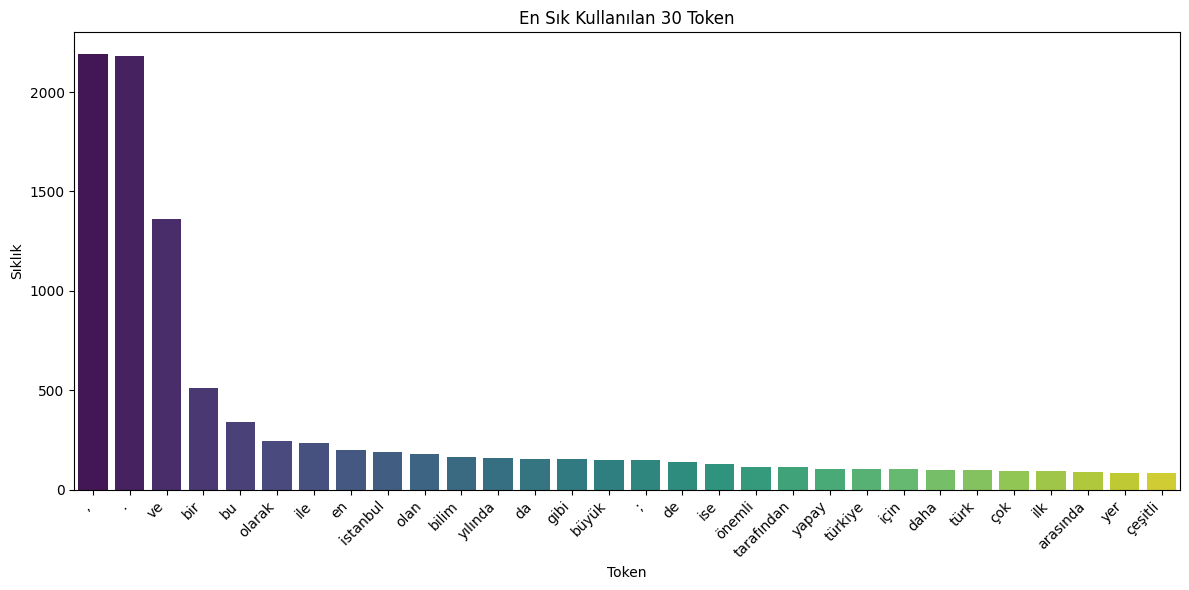

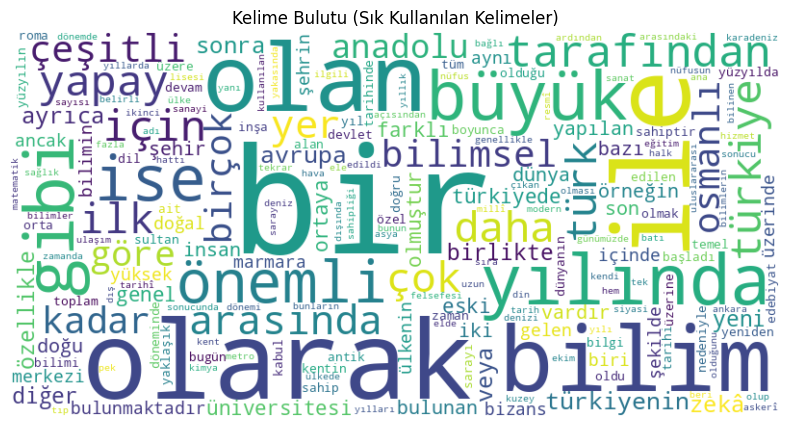


## 4. Kelime İlişkileri ve Anlamsal Analiz (Word Embeddings)
- 'yapay' ve 'zekâ' kelimeleri arasındaki Word2Vec benzerliği: 0.9439
  Bu yüksek benzerlik, modelin bu iki terimi yakın bağlamlarda öğrendiğini göstermektedir.

- Rastgele seçilen nadir kelimelerin en benzerleri (Word2Vec):
  - 'yanındadır' kelimesine en yakın 5 kelime:
    - 'kulenin': 0.9963
    - 'bozuk': 0.9961
    - 'köprüler': 0.9961
    - 'demokrasi': 0.9961
    - 'etkileyecek': 0.9961
  - 'yetenekli' kelimesine en yakın 5 kelime:
    - 'insanlığın': 0.9944
    - 'limanları': 0.9923
    - 'yükselme': 0.9921
    - 'örneğidir': 0.9918
    - 'hâlen': 0.9917
  - 'başlanmıştı' kelimesine en yakın 5 kelime:
    - 'kitleler': 0.9965
    - 'açar': 0.9963
    - 'görecelik': 0.9963
    - 'hedefi': 0.9962
    - 'bulunmaktaydı': 0.9961
  - 'açılarını' kelimesine en yakın 5 kelime:
    - 'q': 0.9966
    - 'büyümeler': 0.9963
    - 'derecede': 0.9961
    - 'insanlık': 0.9961
    - 'bulunabilir': 0.9960
  - 'tanımlıyordu' kelimesin

In [12]:
# 5. Gün: Sonuçların Derlenmesi ve Raporlama

print("--- 5. Gün: Sonuçların Derlenmesi ve Raporlama ---")

# Önceki günlerden gelen ana değişkenlerin mevcut olduğundan emin olalım
# Eğer Colab oturumu yeniden başlatıldıysa, önceki günkü importları ve veri yüklemelerini tekrar çalıştırmak gerekebilir.
# Basitlik için sadece gerekli olanları burada çağırıyorum.
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random

# Eğer Word2Vec modeli (model) ve token değişkenleri (all_tokens, token_counts, tokenized_articles)
# ve meaningful_rare_words önceki hücrelerde tanımlanmadıysa, burada tekrar yükleyelim.
# Normalde 1. günden itibaren sırayla çalıştırıldığında bu değişkenler mevcut olur.

# processed_turkish_tokens.txt dosyasından tokenleri yükleyelim (yedek olarak)
try:
    with open("processed_turkish_tokens.txt", "r", encoding="utf-8") as f:
        all_tokens = [line.strip() for line in f if line.strip()]
    token_counts = Counter(all_tokens)
    print("processed_turkish_tokens.txt başarıyla yüklendi.")
except FileNotFoundError:
    print("Hata: 'processed_turkish_tokens.txt' bulunamadı. Lütfen 2. günkü adımları tamamlayın.")
    all_tokens = []
    token_counts = Counter()

# tokenized_articles'ı da yeniden oluşturalım (Word2Vec için gerekliydi)
try:
    with open("raw_turkish_wikipedia_text.txt", "r", encoding="utf-8") as f:
        raw_text_content_for_context = f.read()
    articles_for_context = [art.strip() for art in raw_text_content_for_context.split('---') if art.strip()]

    import re
    from nltk.tokenize import word_tokenize
    cleaned_texts_for_context = []
    for article_text in articles_for_context:
        text = re.sub(r'\[.*?\]', '', article_text)
        text = re.sub(r'\n+', '\n', text)
        text = re.sub(r' +', ' ', text)
        text = text.strip()
        text = re.sub(r'[^\w\sçÇğĞıİöÖşŞüÜ.,!?;:]', '', text)
        text = re.sub(r'([.,!?;:])(\S)', r'\1 \2', text)
        text = re.sub(r' +', ' ', text)
        text = text.strip()
        cleaned_texts_for_context.append(text)

    tokenized_articles = []
    for text in cleaned_texts_for_context:
        tokens = word_tokenize(text.lower(), language='turkish')
        tokenized_articles.append(tokens)
    print("tokenized_articles başarıyla yeniden oluşturuldu.")
except Exception as e:
    print(f"tokenized_articles yeniden oluşturulurken hata oluştu: {e}")
    tokenized_articles = []

# meaningful_rare_words'u da tekrar tanımlayalım (nadir kelimelerin analizi için gerekli)
if all_tokens:
    rare_threshold = 2
    truly_rare_tokens = [(token, count) for token, count in token_counts.items() if count <= rare_threshold]
    meaningful_rare_words = [(token, count) for token, count in truly_rare_tokens if len(token) > 5 and token.isalpha()]
else:
    meaningful_rare_words = []


# Word2Vec modelini yeniden eğitelim (eğer önceki oturumda kaybolduysa)
# Bu kısım sadece raporlama için modelin tekrar kullanılabilmesi için.
# Genellikle model eğitildikten sonra kaydedilir ve yüklenir, burada basitçe tekrar eğitiyoruz.
model = None
try:
    from gensim.models import Word2Vec
    if tokenized_articles:
        model = Word2Vec(sentences=tokenized_articles, vector_size=100, window=5, min_count=1, workers=4, sg=1)
        model.train(tokenized_articles, total_examples=model.corpus_count, epochs=10)
        print("Word2Vec modeli raporlama için yeniden eğitildi.")
except Exception as e:
    print(f"Word2Vec modeli yeniden eğitilirken hata oluştu: {e}")
    model = None


# --- Rapor Taslağı ---

print("\n--- Doğal Dil İşleme Projesi: Wikipedia Metinleri Analizi Raporu ---")
print("Bu rapor, Wikipedia'dan alınan Türkçe metinlerin doğal dil işleme süreçlerinden geçirilerek elde edilen bulguları özetlemektedir.\n")

print("## 1. Veri Seti Genel Bakış")
print(f"- Toplam yüklü makale sayısı: {len(articles_for_context) if 'articles_for_context' in locals() else 'Bilinmiyor'}")
print(f"- Toplam ham karakter sayısı: {len(raw_text_content_for_context) if 'raw_text_content_for_context' in locals() else 'Bilinmiyor'}")
print("Veri seti, Türkçe Wikipedia'dan yapay zeka ile ilgili konuları içermektedir. Ham veriler temizlenerek tokenizasyon için hazır hale getirilmiştir.")

print("\n## 2. Tokenizasyon ve Temizleme Sonuçları")
print(f"- Toplam token sayısı (noktalama dahil): {len(all_tokens)}")
print(f"- Toplam benzersiz token (kelime dağarcığı) sayısı: {len(token_counts)}")
if len(all_tokens) > 0:
    type_token_ratio = len(token_counts) / len(all_tokens)
    print(f"- Tip-Token Oranı (TTR): {type_token_ratio:.4f} (Metin çeşitliliği göstergesi)")
print("Noktalama işaretleri ayrı token olarak tutulmuş, metinlerdeki fazla boşluklar ve referanslar temizlenmiştir.")

print("\n## 3. Token Sıklığı ve Dağılımı")
print("En sık kullanılan 20 token:")
for token, count in token_counts.most_common(20):
    print(f"  - '{token}': {count}")

print("\nEn nadir kullanılan 20 token (2 veya daha az geçen anlamlı kelimelerden):")
for token, count in sorted(meaningful_rare_words, key=lambda item: item[1])[:20]:
    print(f"  - '{token}': {count}")

# En sık kullanılan tokenların görselleştirilmesi
if token_counts:
    top_tokens = token_counts.most_common(30)
    words = [word for word, count in top_tokens]
    counts = [count for word, count in top_tokens]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=words, y=counts, palette='viridis')
    plt.title('En Sık Kullanılan 30 Token')
    plt.xlabel('Token')
    plt.ylabel('Sıklık')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Kelime Bulutu
filtered_tokens_for_wordcloud = [token for token in all_tokens if token.isalpha() and len(token) > 2]
if filtered_tokens_for_wordcloud:
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          collocations=False,
                          min_font_size=10).generate(" ".join(filtered_tokens_for_wordcloud))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Kelime Bulutu (Sık Kullanılan Kelimeler)')
    plt.show()

print("\n## 4. Kelime İlişkileri ve Anlamsal Analiz (Word Embeddings)")
if model:
    if 'yapay' in model.wv and 'zekâ' in model.wv:
        similarity = model.wv.similarity('yapay', 'zekâ')
        print(f"- 'yapay' ve 'zekâ' kelimeleri arasındaki Word2Vec benzerliği: {similarity:.4f}")
        print("  Bu yüksek benzerlik, modelin bu iki terimi yakın bağlamlarda öğrendiğini göstermektedir.")

    print("\n- Rastgele seçilen nadir kelimelerin en benzerleri (Word2Vec):")
    if meaningful_rare_words:
        sample_rare_words_for_embedding = [token for token, count in random.sample(meaningful_rare_words, min(5, len(meaningful_rare_words)))]
        for word in sample_rare_words_for_embedding:
            if word in model.wv:
                print(f"  - '{word}' kelimesine en yakın 5 kelime:")
                try:
                    for similar_word, similarity in model.wv.most_similar(word, topn=5):
                        print(f"    - '{similar_word}': {similarity:.4f}")
                except KeyError:
                    print(f"    - '{word}' kelimesi Word2Vec modelinde yeterince bağlam bulamadı.")
            else:
                print(f"  - '{word}' kelimesi modelin sözlüğünde bulunamadı.")
    else:
        print("  Anlamlı nadir kelime bulunamadı.")
else:
    print("- Word2Vec modeli eğitilemediği veya yüklenemediği için anlamsal analiz yapılamadı.")

print("\n## 5. Sonuç ve Gelecek Adımlar")
print("Bu proje kapsamında, Wikipedia'dan toplanan Türkçe metinler başarıyla temizlenmiş, tokenize edilmiş ve detaylı bir dilbilimsel analize tabi tutulmuştur.")
print("Elde edilen token frekansları, nadir kelime analizleri ve Word2Vec tabanlı kelime embeddingleri, veri setimizin dilbilgisel ve anlamsal yapısı hakkında değerli bilgiler sunmuştur.")
print("Bu analizler, yapay zeka metin üretim modeli gibi ileri seviye NLP görevleri için sağlam bir temel sağlamaktadır.")
print("\nGelecek adımlar şunları içerebilir:")
print("  - Stop word'lerin ve belki de noktalama işaretlerinin kaldırılmasıyla veri setinin daha da optimize edilmesi.")
print("  - Daha büyük bir veri seti üzerinde Word2Vec modelinin eğitilmesi veya önceden eğitilmiş modellerin kullanılması.")
print("  - Elde edilen kelime embedding'lerini kullanarak bir metin üretim (örneğin LSTM veya Transformer tabanlı) modelinin oluşturulması ve eğitilmesi.")
print("  - Üretilen metinlerin kalitesinin nicel ve nitel olarak değerlendirilmesi.")

print("\n--- Raporlama Tamamlandı. Proje Başarıyla Sonuçlandı! ---")